In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pylab
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
data_eda = pd.read_excel("/Users/sheikita/Desktop/data/H-1B_EDAco.xlsx")

In [3]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 52 columns):
CASE_NUMBER                    7001 non-null object
CASE_STATUS                    7001 non-null object
CASE_SUBMITTED                 7001 non-null datetime64[ns]
DECISION_DATE                  7001 non-null datetime64[ns]
VISA_CLASS                     7001 non-null object
EMPLOYMENT_START_DATE          7000 non-null datetime64[ns]
EMPLOYMENT_END_DATE            7000 non-null datetime64[ns]
EMPLOYER_NAME                  7001 non-null object
EMPLOYER_BUSINESS_DBA          791 non-null object
EMPLOYER_ADDRESS               7001 non-null object
EMPLOYER_CITY                  7001 non-null object
EMPLOYER_STATE                 7001 non-null object
EMPLOYER_POSTAL_CODE           7001 non-null object
EMPLOYER_COUNTRY               7001 non-null object
EMPLOYER_PROVINCE              39 non-null object
EMPLOYER_PHONE                 7001 non-null int64
EMPLOYER_PHONE_EXT             35

In [4]:
data_eda['DURATION'] = data_eda['DECISION_DATE'] - data_eda['CASE_SUBMITTED']

In [5]:
eda_a = data_eda[['DURATION','CASE_STATUS','SOC_CODE']]
eda_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 3 columns):
DURATION       7001 non-null timedelta64[ns]
CASE_STATUS    7001 non-null object
SOC_CODE       6999 non-null object
dtypes: object(2), timedelta64[ns](1)
memory usage: 164.2+ KB


In [6]:
eda_a = eda_a.fillna({"SOC_CODE": 0})
eda_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 3 columns):
DURATION       7001 non-null timedelta64[ns]
CASE_STATUS    7001 non-null object
SOC_CODE       7001 non-null object
dtypes: object(2), timedelta64[ns](1)
memory usage: 164.2+ KB


In [7]:
eda_a['CASE_STATUS'] = eda_a['CASE_STATUS'].astype('category')
eda_a['SOC_CODE'] = eda_a['SOC_CODE'].astype('category')

In [8]:
# Converting Duration to a float data type. 
eda_a['DURATION'] = eda_a['DURATION']/ np.timedelta64(1, 'h')

In [9]:
# Assign a classification (categories) to the Case Status and Soc Code
eda_a["C_cat"] = eda_a["CASE_STATUS"].cat.codes
eda_a["S_cat"] = eda_a["SOC_CODE"].cat.codes
eda_a.head()

,DURATION,CASE_STATUS,SOC_CODE,C_cat,S_cat
0,96.0,CERTIFIED,15-1132,0,55
1,96.0,CERTIFIED,13-2011,0,39
2,168.0,CERTIFIED,15-1141,0,58
3,168.0,CERTIFIED,15-1132,0,55
4,168.0,CERTIFIED,15-1132,0,55


###  How many hours were used to process the total number of applications for each category?
Method 1: Use "groupby"
Method 2: Via Dictionary

In [11]:
#Use groupby  For the Status Category "0" or "Certified", how many hours were used to process the 55330 apps?
#Unit of Duration is hours
option1= eda_a.groupby('CASE_STATUS').agg({'S_cat': 'count', 'DURATION': 'sum'})
print(option1)

                     S_cat   DURATION
CASE_STATUS                          
CERTIFIED             5330   745560.0
CERTIFIED-WITHDRAWN    637  5587392.0
DENIED                 908    66720.0
WITHDRAWN              126   766032.0


In [12]:
#Calculate correlation
corre1 = option1.corr(method='pearson')
print(corre1)

             S_cat  DURATION
S_cat     1.000000 -0.263181
DURATION -0.263181  1.000000


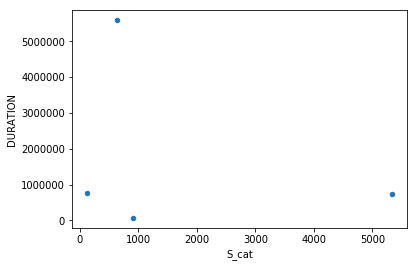

In [14]:
ax2 = option1.plot.scatter(x='S_cat', y = 'DURATION')

In [15]:
#Method 2
dic ={'Index':[0,1,2,3], 'S_cat': [0,1,2,3], 'Status_Count':[5330, 637, 908, 126], 'Sum Duration': [31065, 232808, 2780, 31918]}
print(dic)

{'Index': [0, 1, 2, 3], 'S_cat': [0, 1, 2, 3], 'Status_Count': [5330, 637, 908, 126], 'Sum Duration': [31065, 232808, 2780, 31918]}


In [17]:
dic_pd = pd.DataFrame.from_dict(dic)

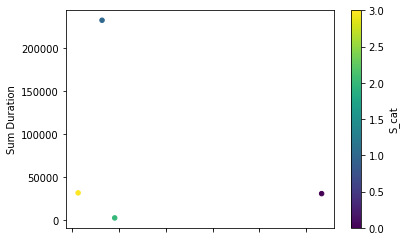

In [18]:
ax1 = dic_pd.plot.scatter(x='Status_Count', y = 'Sum Duration', c='S_cat', colormap='viridis')

In [19]:
corr0 = dic_pd.corr(method='pearson')
print(corr0)

                 Index     S_cat  Status_Count  Sum Duration
Index         1.000000  1.000000     -0.822328     -0.276233
S_cat         1.000000  1.000000     -0.822328     -0.276233
Status_Count -0.822328 -0.822328      1.000000     -0.263181
Sum Duration -0.276233 -0.276233     -0.263181      1.000000


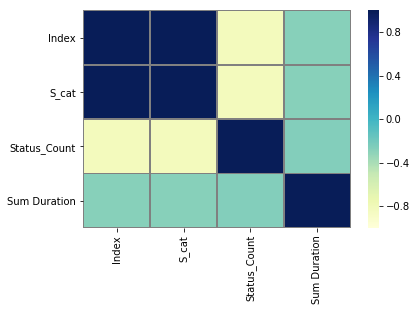

In [20]:
sns.heatmap(corr0, vmin=-1, vmax=1, linecolor = 'grey', linewidths = .5, cmap="YlGnBu", xticklabels=corr0.columns.values, yticklabels=corr0.columns.values)
plt.show()

In [21]:
option2= eda_a.groupby('SOC_CODE').agg({'C_cat': 'count', 'DURATION': 'sum'})
print(option2)

          C_cat  DURATION
SOC_CODE                 
0             2      72.0
11-1011      33    4464.0
11-1021      41    5952.0
11-2011       7     816.0
11-2021     102   57240.0
11-2022      22    8856.0
11-2031       7    1344.0
11-3011       3     288.0
11-3021     197  120312.0
11-3031      69   24432.0
11-3051       9    1080.0
11-3061       6     792.0
11-3071       5   12696.0
11-3121       2     192.0
11-3131       3     456.0
11-9013      15    4008.0
11-9021       8     912.0
11-9031       1      72.0
11-9033       8     816.0
11-9041      36   11232.0
11-9051       2     192.0
11-9111       4   10032.0
11-9121       6    2736.0
11-9141       1      96.0
11-9151       3     264.0
11-9199      10    1152.0
13-1011       1      24.0
13-1022       1      48.0
13-1023       1      96.0
13-1041       8     984.0
...         ...       ...
31-9096       1      24.0
31-9099       1      96.0
33-9021       1      24.0
35-1011       2     168.0
35-2011       1     144.0
35-2014     

In [22]:
#Unit of Duration (hours)
option2.sort_values('C_cat', ascending=False)

,C_cat,DURATION
SOC_CODE,,
15-1132,2202,2441760.0
15-1121,487,518808.0
15-1199,377,268752.0
29-1069,367,345384.0
15-1133,328,181680.0
11-3021,197,120312.0
17-2072,174,125664.0
13-2011,151,65520.0
13-2051,141,104784.0


In [23]:
corr2 = option2.corr(method='pearson')
print(corr2)

           C_cat  DURATION
C_cat     1.0000    0.9826
DURATION  0.9826    1.0000


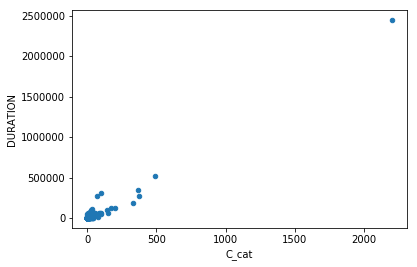

In [24]:
ax3 = option2.plot.scatter(x='C_cat', y = 'DURATION')

In [25]:
corrs = option2.corr(method='spearman')
print(corrs)

             C_cat  DURATION
C_cat     1.000000  0.847872
DURATION  0.847872  1.000000


The resulting correlation on the variables:  count job titles and how long it takes to process them is positive and very close to 1. Thus,  both variables have a stronger linear relationship. 